<a href="https://colab.research.google.com/github/Daarini1501/CODSOFT/blob/main/movie_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving movie ratings dataset.csv to movie ratings dataset (6).csv
Detected encoding: ISO-8859-1
First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Ritupa

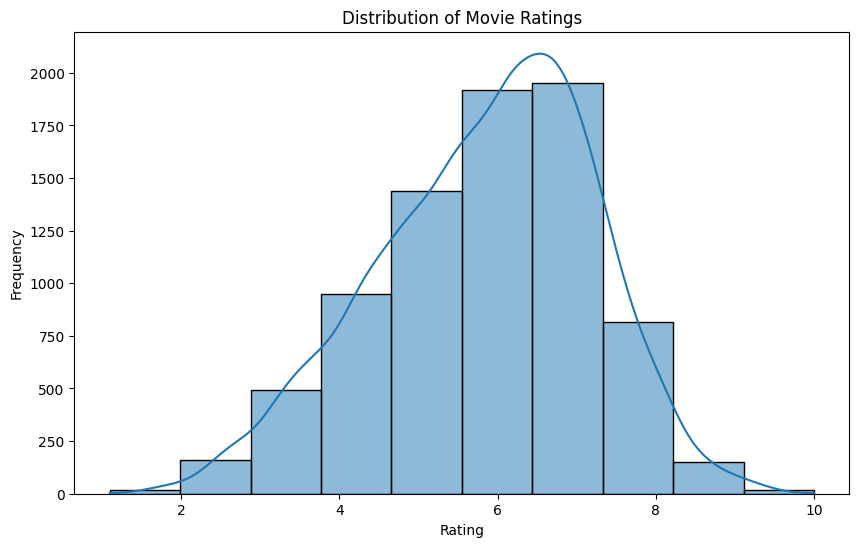

<ipython-input-7-4ee7f3a68517>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_movies.index, y=top_rated_movies.values, palette='viridis')


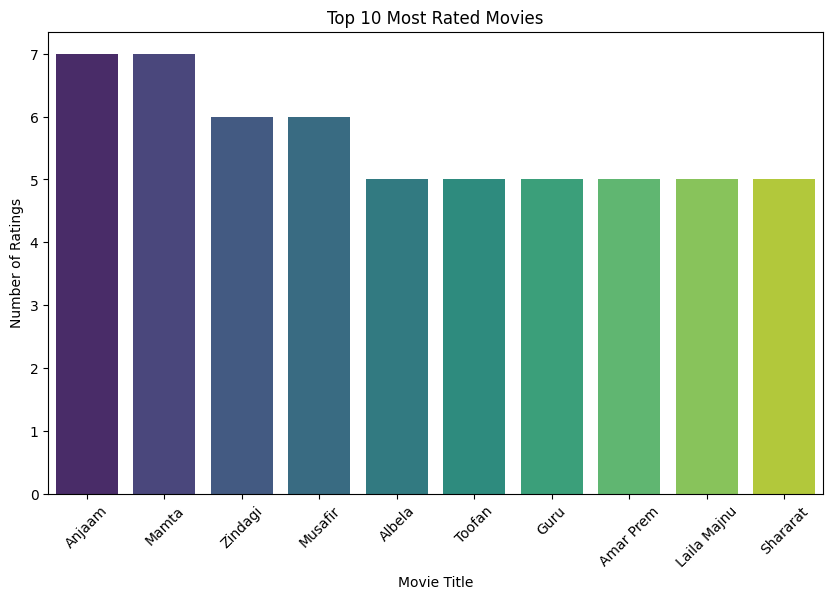

<ipython-input-7-4ee7f3a68517>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_per_movie.index, y=average_rating_per_movie.values, palette='magma')


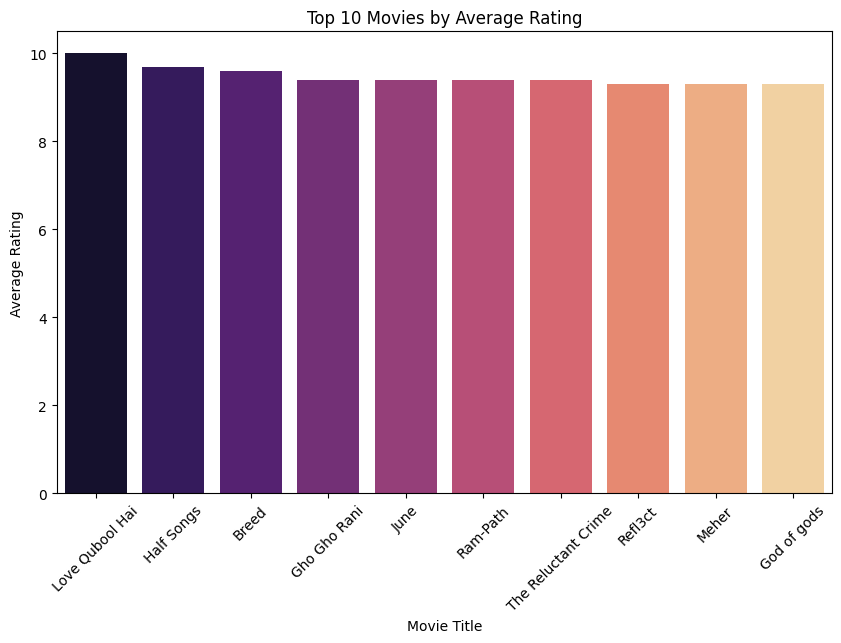

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Assuming the dataset is named 'movie ratings dataset.csv'
file_name = 'movie ratings dataset.csv'

# Detect the file's encoding
with open(file_name, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

# Read the file with the detected encoding
df = pd.read_csv(file_name, encoding=encoding)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 most rated movies
top_rated_movies = df['Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies.index, y=top_rated_movies.values, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

# Average rating per movie
average_rating_per_movie = df.groupby('Name')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_per_movie.index, y=average_rating_per_movie.values, palette='magma')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Distribution of genres (assuming 'genre' column exists)
if 'genre' in df.columns:
    genre_distribution = df['genre'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='coolwarm')
    plt.title('Distribution of Movie Genres')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap (if there are numerical columns)
numerical_columns = df.select_dtypes(include=[np.number]).columns
if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Pairplot for numerical columns (if there are multiple numerical columns)
if len(numerical_columns) > 1:
    sns.pairplot(df[numerical_columns])
    plt.show()

# Boxplot of ratings by genre (if 'genre' column exists)
if 'genre' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='genre', y='rating', data=df, palette='Set3')
    plt.title('Boxplot of Ratings by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Rating')
    plt.xticks(rotation=45)
    plt.show()